In [86]:
import openpyxl
book = openpyxl.load_workbook("Elotus Symptom - Disease Index.xlsx")
sheet = book.active
last_row = len(sheet['A'])+1
last_row = 100

In [87]:
conditions = []
for i in range(2, last_row):
    conditions.append(sheet['A'+str(i)].value)
conditions = sorted(list(set(conditions)))
len(conditions)

21

In [88]:
symptons = []
equivalencia = []
for i in range(2, last_row):
    valor =str(sheet['B'+str(i)].value)
    if(valor.startswith("See")):
        equivalencia.append(valor)
    else:
        symptons.append(valor)
symptons = sorted(list(set(symptons)))
print(f'Sintomas: {len(symptons)}; equivalencias: {len(equivalencia)}')

Sintomas: 93; equivalencias: 4


In [89]:
diagnostics = []
for i in range(2, last_row):
    valor =sheet['C'+str(i)].value
    if(valor and valor!='None'):
        diagnostics.append(valor)
diagnostics = sorted(list(set(diagnostics)))
print(f'Diagnósticos:{len(diagnostics)}')

Diagnósticos:67


In [90]:
import random
def random_color():
    cor = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
    return cor[0]

dict_cores = dict()
for c in conditions:
    dict_cores[c] = random_color()

In [91]:
from graphviz import Digraph

g = Digraph('Doenças')
g.attr(rankdir='LR', engine="neato")
g.node_attr.update(fontname='verdana', fontsize='8')

with g.subgraph(name='cluster_c') as sub:
    for c in conditions:
        sub.node(c, color=dict_cores[c])
with g.subgraph(name='cluster_s') as subs:
    for s in symptons:
        subs.node(s)
with g.subgraph(name='cluster_d') as subd:
    for d in diagnostics:
        subd.node(d)

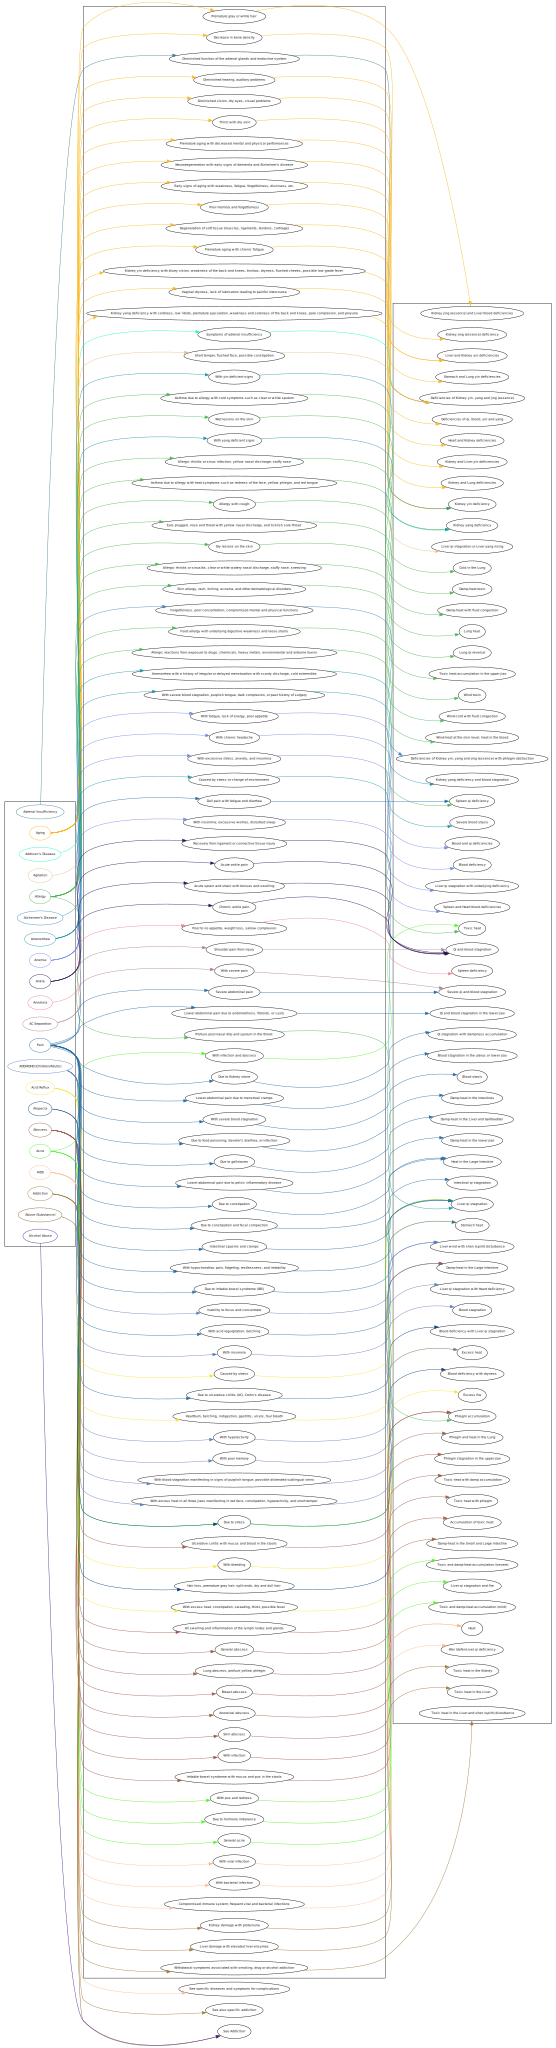

In [92]:
for i in range(2, last_row):
    condicao = str(sheet['A'+str(i)].value)
    sintoma = str(sheet['B'+str(i)].value)
    diagnostico = str(sheet['C'+str(i)].value)
    if(diagnostico!='None'):
        g.edge(sintoma,diagnostico, color=dict_cores[condicao])
    if(sintoma):
        g.edge(condicao,sintoma, color=dict_cores[condicao])
g

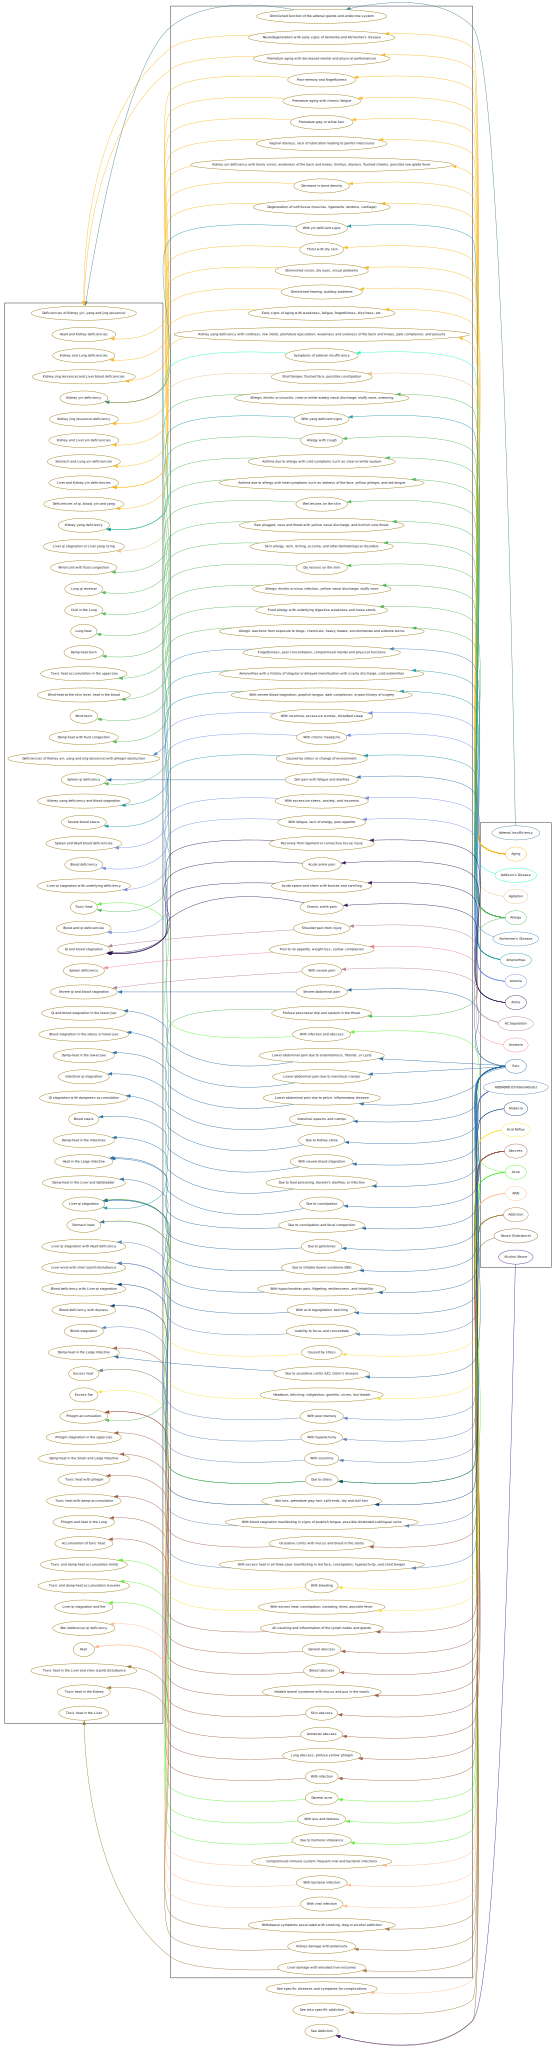

In [93]:
import numpy as np
g.attr(rankdir='RL', engine="osage")
g.node_attr.update( color = cor[0])
g